## Import the required libraries


In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [2]:
#data = pd.read_csv('')
#data.head()
url = "https://raw.githubusercontent.com/krishnaik06/Complete-Data-Science-With-Machine-Learning-And-NLP-2024/main/3-Complete%20Linear%20Regression/Practicals/economic_index.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


In [3]:
# Brief description of the dataset
print("Dataset Description:")
print(df.describe())
print("\n\nDataset Information:")
print(df.info())


Dataset Description:
       Unnamed: 0         year      month  interest_rate  unemployment_rate  \
count   24.000000    24.000000  24.000000      24.000000           24.00000   
mean    11.500000  2016.500000   6.500000       2.072917            5.77500   
std      7.071068     0.510754   3.526299       0.349527            0.33002   
min      0.000000  2016.000000   1.000000       1.750000            5.30000   
25%      5.750000  2016.000000   3.750000       1.750000            5.50000   
50%     11.500000  2016.500000   6.500000       2.000000            5.85000   
75%     17.250000  2017.000000   9.250000       2.500000            6.10000   
max     23.000000  2017.000000  12.000000       2.750000            6.20000   

       index_price  
count    24.000000  
mean   1070.083333  
std     210.735341  
min     704.000000  
25%     928.250000  
50%    1061.000000  
75%    1239.000000  
max    1464.000000  


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 en

The dataset seems to contain economic indicators for different months and years. Each attributes contain:

*Unnamed: 0:This is likely an index column that was automatically created when the dataset was saved or exported. It doesn't contain any meaningful data and can usually be dropped.

*Year:The year of the record.

*Month:The month of the record. This provides more granularity within the year.

*Interest_rate:The interest rate for the given month and year. This economic indicator affects various aspects of the economy, including borrowing costs and consumer spending.

*Unemployment_rate:The unemployment rate for the given month and year. This is an indicator of the economic health, showing the percentage of unemployed individuals actively seeking work.

*Index_price: The price of a particular index for the given month and year. This represents economic index relevant to the dataset.


# 2. Objectives


The main objective of this analysis is to develop a predictive model focused on understanding how variations in interest_rate and unemployment_rate influence the index_price.

# 3. Linear Regression Models


Data Exploration And Cleaning

Dropping the unnamed column

In [12]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
# check for missing values
df.isnull().sum()

month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [16]:
# Check for Correlation with respect the dependent variable(index_price)
np.abs(df.corr()['index_price']).sort_values(ascending=False)

index_price          1.000000
interest_rate        0.935793
unemployment_rate    0.922338
month                0.481287
Name: index_price, dtype: float64

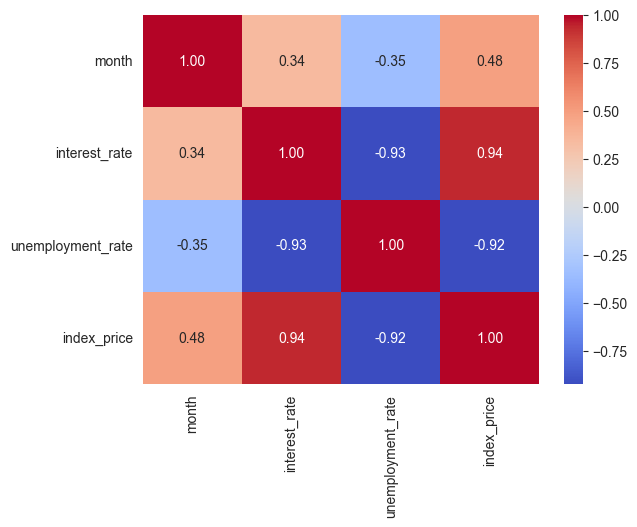

In [17]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [21]:
# Split data
X = df.drop(['index_price'], axis=1)
y = df['index_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#drop the month axis
X = X.drop(['month'], axis=1)
X.head()


,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


Training and Evaluating the models


In [25]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Simple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge


In [28]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)


In [29]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [30]:
# Evaluation
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mae, rmse

mae_linear, rmse_linear = evaluate_model(y_test, y_pred_linear)
mae_poly, rmse_poly = evaluate_model(y_test, y_pred_poly)
mae_ridge, rmse_ridge = evaluate_model(y_test, y_pred_ridge)

print(f"Simple Linear Regression MAE: {mae_linear}, RMSE: {rmse_linear}")
print(f"Polynomial Regression MAE: {mae_poly}, RMSE: {rmse_poly}")
print(f"Ridge Regression MAE: {mae_ridge}, RMSE: {rmse_ridge}")

Simple Linear Regression MAE: 55.91243085312301, RMSE: 79.4891658856335
Polynomial Regression MAE: 100.71384118702096, RMSE: 120.94997630496349
Ridge Regression MAE: 55.05958789709591, RMSE: 77.4752612823018


Based on the evaluation metrics, Ridge Regression has the best performance with the lowest MAE and RMSE, indicating it is the most reliable model among those tested in this instance. This model likely captures the primary relationship between the variables effectively without overfitting.

# 4. Insights and key findings


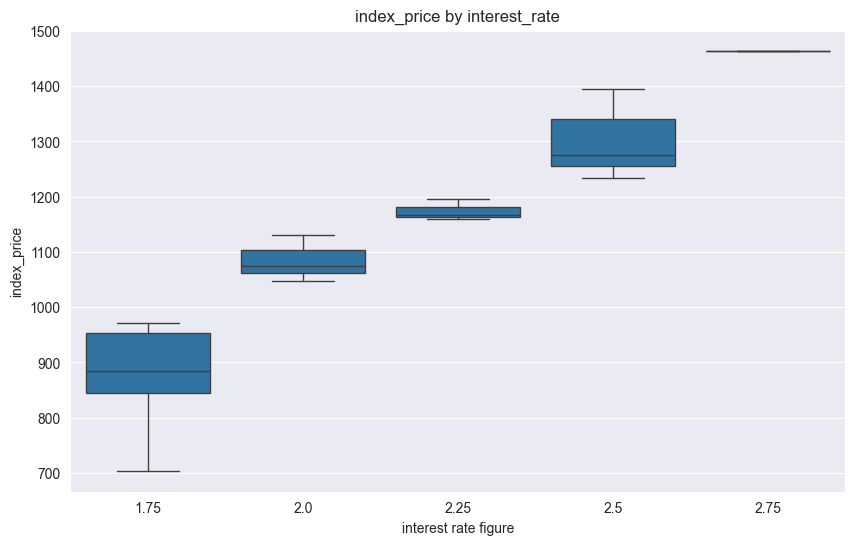

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='interest_rate', y='index_price', data=df)
plt.title('index_price by interest_rate')
plt.xlabel('interest rate figure')
plt.ylabel('index_price')
plt.show()

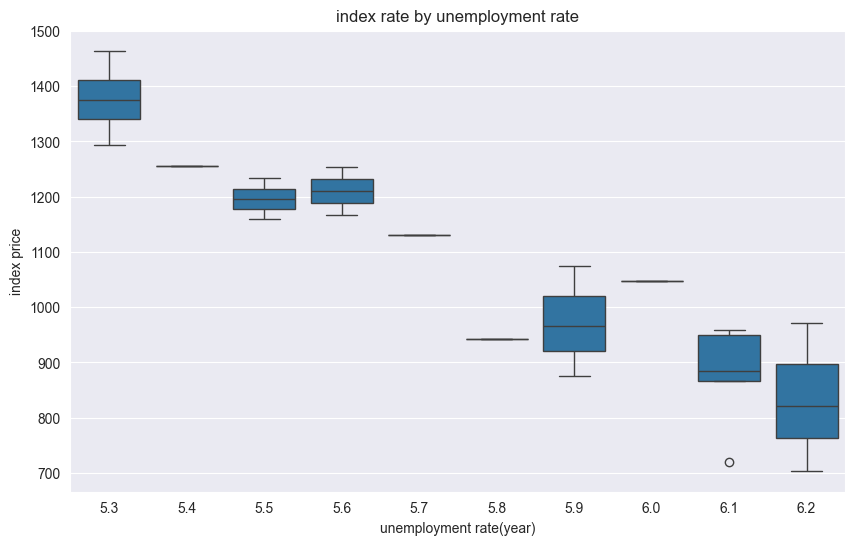

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='unemployment_rate', y='index_price', data=df)
plt.title('index rate by unemployment rate')
plt.xlabel('unemployment rate(year)')
plt.ylabel('index price')
plt.show()

1.An increase in interest rates brings about an increase in the index price, which suggests that higher interest rates are associated with economic conditions that benefit the index price, such as higher returns on investments or increased economic activity.



2.There is a strong negative correlation, which suggests that higher unemployment rates are associated with lower index prices. This might reflect that as unemployment increases, economic conditions worsen, which can negatively affect market indices.

# 5. Next Steps


1.Explore non-linear models like Random Forests or Gradient Boosting Machines.


2.Analyze trends over time to identify seasonal variations and long-term changes.